## **Brent 2010-2019**
Цена нефти марки Brent (https://investfunds.ru/indexes/624/) Данные из набора содержат дневные цены за период от 2010 до 2019. Данные были обработаны, но не меняли основное содержание ключевого признака. Отличие от исходного описания - дополнение признаками по календарю.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

In [ ]:
path_brent = '/content/drive/MyDrive/Анализ_Данных_Соцкова_Вероника_11-802/Project/my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Основные статистики ряда

In [ ]:
brent_data.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,81.533547,2014.661042,6.51706,15.715786,2.505062,182.901762,26.486689,2.537308,0.027747,0.026997,0.029621
std,26.349469,2.663525,3.43026,8.780275,1.112684,104.741067,14.935147,1.894937,0.164277,0.162104,0.169572
min,27.850000,2010.000000,1.00000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,56.840000,2012.000000,4.00000,8.000000,2.000000,92.000000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,77.710000,2015.000000,7.00000,16.000000,3.000000,183.000000,27.000000,2.000000,0.000000,0.000000,0.000000
75%,108.190000,2017.000000,9.00000,23.000000,3.000000,273.000000,39.000000,4.000000,0.000000,0.000000,0.000000
max,126.900000,2019.000000,12.00000,31.000000,4.000000,366.000000,53.000000,6.000000,1.000000,1.000000,1.000000


Проверим на пропущенные значения:

In [ ]:
brent_data[brent_data['Значение'].isnull()].count()

Значение           0
year               0
month              0
dayofmonth         0
quarter            0
dayofyear          0
weekofyear         0
dayofweek          0
is_holiday         0
is_prev_holiday    0
is_next_holiday    0
dtype: int64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=brent_data.index, y=brent_data['Значение']))
fig.update_layout(legend_orientation="h",
                  title="Brent",
                  xaxis_title="Дата",
                  yaxis_title="Цена",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Вывод: ряд по ценам на нефть очень похож на нестационарный.

Цена нефти не показывает никакой подобной динамики. Связать цены на нефть с календарем на этом этапе анализа не удалось. Это видно, по не очень впечатляющим результатам моделирования цены нефти. Также заметим провал цены на нефть в 2014.

In [ ]:
fig = px.box(brent_data['Значение'], y="Значение", points="all")
fig.show()

На графике заметим, что нет выбросов. Однако, необходимо помнить, что в случае временного ряда это не совсем корректное исследование, т.к. существование цикличности и тренда приводят к существенному изменению значений ряда во времени.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    histfunc="avg", 
    y=brent_data['Значение'], 
    x=brent_data.year, 
    name="sum"))

fig.update_layout(
    xaxis_title_text='Год',
    yaxis_title_text='Среднее значение цены',
    bargap=0.2, # gap between bars of adjacent location coordinates
)

fig.show()

При построении моделей временных рядов принято различать, в зависимости от наличия основной тенденции, стационарные и нестационарные временные ряды. Использование в регрессионной модели нестационарных временных рядов может привести к фиктивным результатам или к построению так называемой «мнимой» или ложной регрессии (spurious regression).

Посмотрим на ресемплинг (перерасчет рядов в новые временные отрезки, месячные по нефти).

In [ ]:
brent_data_m = brent_data.resample('M').mean()

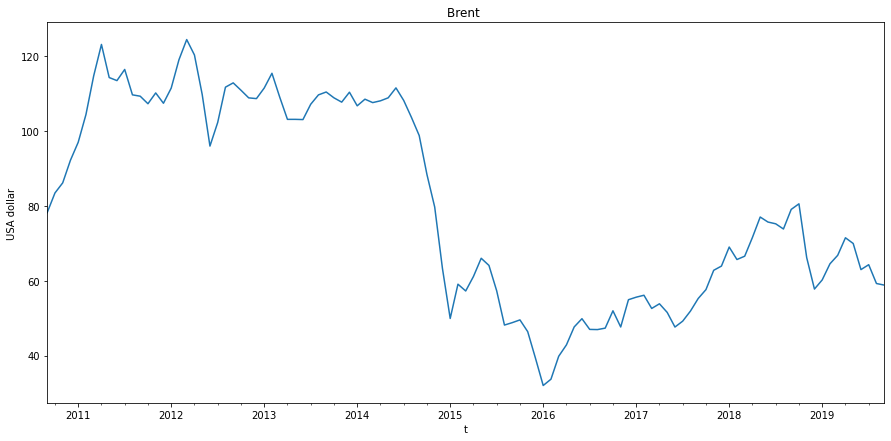

In [ ]:
brent_data_m['Значение'].plot( style='-', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.show()

Посмотрим на годовой график цен на нефть.

In [ ]:
brent_data_y = brent_data.resample('Y').mean()

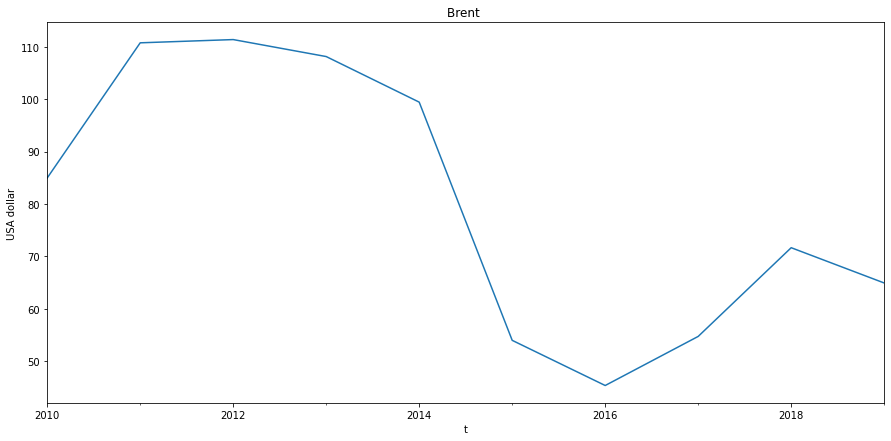

In [ ]:
brent_data_y['Значение'].plot( style='-', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.show()

Можно проверить как ведут себя первые разности (x(t)-x(t-1)). Если ряд таких разностей стационарен, то можно гарантировать стационарность ряда после удаления основной его части.

In [ ]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=brent_data.iloc[:-1].index, 
                         y=d_brent_data, 
                         mode='markers',
                         name='Цена нефти Brent, USA Dollar'))

fig.show()

У нефти есть кардинальное изменение рассеивания во времени.
Определим значение Расширеного теста Дики-Фуллера(ADF) для нашего ряда.


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
DF_brent = sm.tsa.stattools.adfuller(brent_data['Значение'].values, regression = 'ctt')
DF_brent

(-2.6822144955902334,
 0.46445466836781507,
 1,
 2665,
 {'1%': -4.375483353680849,
  '10%': -3.554633956872604,
  '5%': -3.8346077873672324},
 8609.945844623533)

Наш ряд нестационарный. Проверим первые разности на стационарность.

In [ ]:
DF_data_db = sm.tsa.stattools.adfuller(d_brent_data,regression='ct')
print('коэффициент ADF для 1-й разности для цены нефти: ', DF_data_db[1])

коэффициент ADF для 1-й разности для цены нефти:  0.0


> Получили стационарный ряд, а на основании этого теста наш ряд называют *интегрированным* рядом, т.е. лаги изменение цены стационарны на дневных интервалах.

> Это говорит о том, что нужно разделить модель на отдельные составляющие - тренд по месяцам у нефти отделим от стационарных колебаний вокруг этих компонент.

### **Анализ результатов теста стационарности по Дики-Фуллеру**

Первое значение кортежа ответа содержит показатель статистики теста. Основное значение теста - второй элемент кортежа ответа: если он равен 0 - ряд стационарен, иначе нет. Третий параметр - длина временного отрезка (лага), который был использован при исследовании, а следующий за ним число рассмотренных точек ряда. Следующий по тексту ответа словарь содержит критические оценки по МакКинону для 1 % , 5 %, и 10 % вероятности отклонения гипотезы нестационарности ряда (Нулевая гипотеза теста — ряд не стационарен)

* значение `DF_brent[0] = -2.68` выше критических по всем вариантам и следовательно - ряд нестационарен.

* Поскольку разность 1-го порядка стационарный ряд, то это интегральный ряд. У ряда для разностей нет тренда.

В случае ресемплинга Brent для месячных отсчетов - ряд ближе к стационарным (вероятность, что стационарный повысилась) . Поскольку измерений не очень много, то сделать ресемплинг на годовые метки можно, но не очень интересно (всего 8 лет наблюдений ).

### **Построим модель сглаживания**

> Сглаживание временного ряда, т. е. замена фактических уровней расчетными значениями, имеющими меньшую колеблемость, чем исходные данные. Является простым методом выявления тенденции развития. Соответствующее преобразование называется фильтрованием.

> Будем брать значение в точке с учетом предистории и текущее значение x(i) запишем как усредненную сумму n предшествующих (x(i-n) + x(n-i+1) + ...+ x(i)) * 1/(n + 1). Это пример простой скользящей средней.

In [ ]:
b_ar = brent_data['Значение'].values
b_s = pd.DataFrame(data = brent_data[['Значение']])

In [ ]:
train = b_s.iloc[:-10, :]
test = b_s.iloc[-10:, :]

N2 = 24*7

b_s['z_data'] = (b_s['Значение'] - b_s['Значение'].rolling(window=N2).mean()) / b_s['Значение'].rolling(window=N2).std()
b_s['zp_data'] = b_s['z_data'] - b_s['z_data'].shift(N2)

In [ ]:
def plot_rolling(b_s):
    fig, ax = plt.subplots(3,figsize=(20, 9))
    ax[0].plot(b_s.index, b_s['Значение'], label='исходные данные')
    ax[0].plot(b_s['Значение'].rolling(window=N2).mean(), label="скользящая средняя");
    ax[0].plot(b_s['Значение'].rolling(window=N2).std(), label="скользящая std (x10)");
    ax[0].legend()

    ax[1].plot(b_s.index,b_s.z_data, label="вычли тренд")
    ax[1].plot(b_s.z_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[1].plot(b_s.z_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[1].legend()

    ax[2].plot(b_s.index, b_s.zp_data, label="разности с лагом" +str(N2))
    ax[2].plot(b_s.zp_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[2].plot(b_s.zp_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[2].legend()

    #plt.tight_layout()
   #
    plt.show()

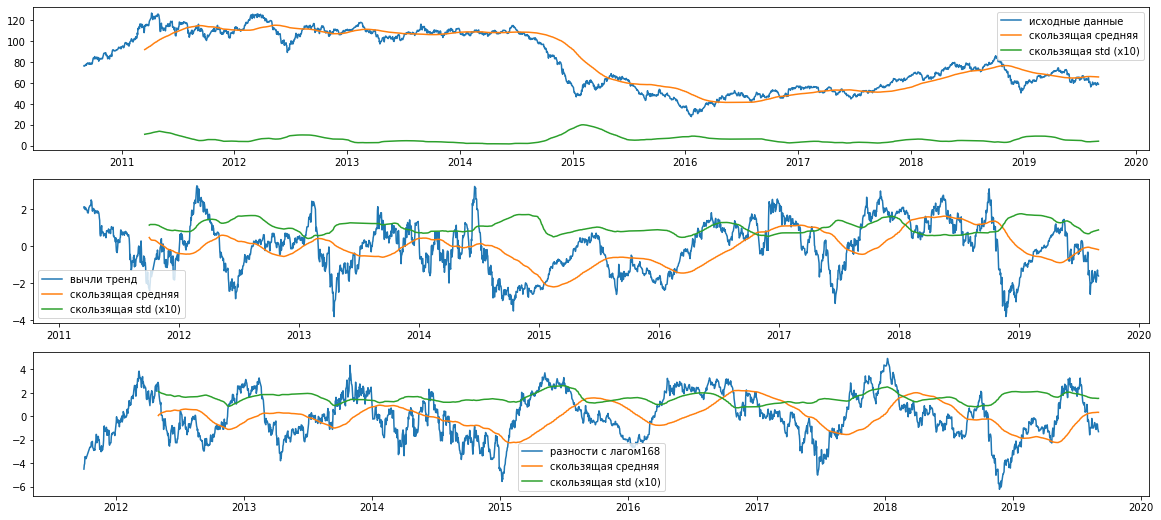

In [ ]:
plot_rolling(b_s)

Теперь будем учитывать предшествующее значение с коэффициентом памяти, например вот так (x(i)a + (1-a)(x(n-i+1) a + (1-a)( ...+ (1-a)*(x(i-n)))) - получим экспоненциальное сглаживание.

Text(0.5, 1.0, 'Brent 2010-2019')

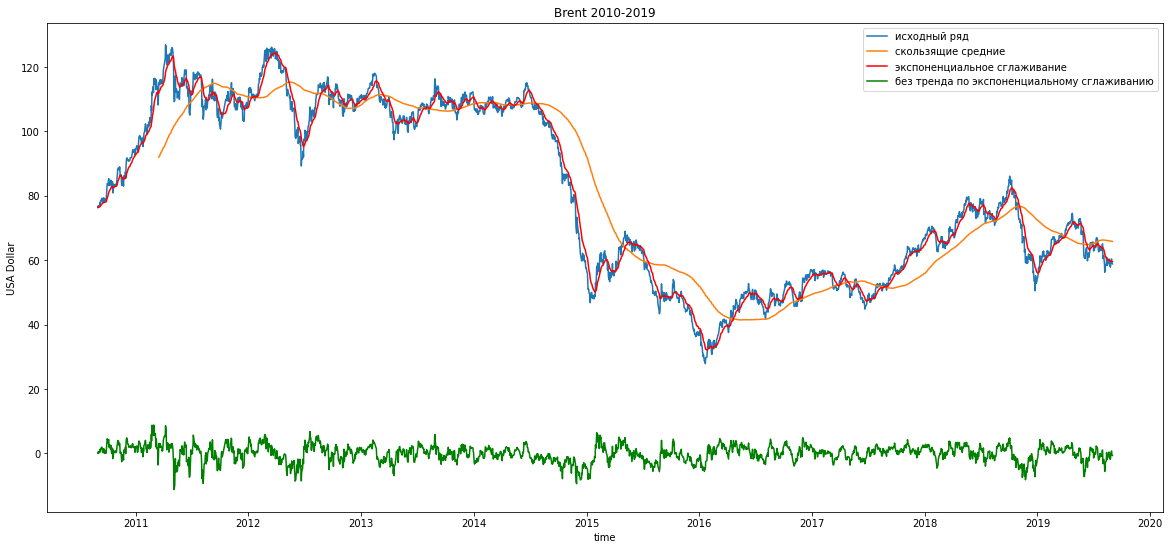

In [ ]:

def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

b_ar_exp_1 = exponential_smoothing(brent_data['Значение'], 0.1)

plt.figure(figsize=(20, 9))
plt.plot(b_s.index, b_s['Значение'], label='исходный ряд')
plt.plot(b_s['Значение'].rolling(window=N2).mean(), label="скользящие средние");

plt.plot(b_s.index,b_ar_exp_1, color = 'red', label="экспоненциальное сглаживание");
plt.plot(b_s.index,b_s['Значение'] - b_ar_exp_1, color = 'green', label="без тренда по экспоненциальному сглаживанию");
plt.xlabel('time')
plt.ylabel('USA Dollar')
plt.legend()
plt.title('Brent 2010-2019')

Результаты сглаживания по экспонентциальной модели заметно ближе и больше похожи на основное направление изменения нашей цены на нефть. 

## **Построение модели**

Добавим истории в наши ряды. Основная информация временного ряда состоит в его предистории. Будем использовать различное число шагов предистории ряда и посмотрим как он будет реагировать на обработку такого представления. Это представление реализовано в Авторегрессионных моделях. В основу авторегрессионных моделей заложено предположение о том, что значение процесса линейно зависит от некоторого количества предыдущих значений того же процесса.

Посмотрим на модели, которые учитывают историю

> ***AR*** - Авторегрессионная модель, которая является сравнительно простой и оперирует параметром: `глубина регрессии - р`. Соберем признаки для такой модели.


In [ ]:
b_ar_exp_1 = pd.DataFrame(data = b_ar_exp_1, index = b_s.index)
df= pd.DataFrame(b_ar_exp_1)
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0.0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0.0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0.0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0.0
df['diff1'].iloc[1:] = df.iloc[:-1,0].values-df.iloc[1:,0].values

In [ ]:
df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Дата,,,,,,,,
2010-09-01,76.370000,0.00000,0.0000,0.000,76.370000,76.370000,76.370000,0.000000
2010-09-02,76.422000,76.37000,0.0000,0.000,76.370520,76.371560,76.374160,-0.052000
2010-09-03,76.436800,76.42200,76.3700,0.000,76.371183,76.373517,76.379171,-0.014800
2010-09-04,76.455120,76.43680,76.4220,76.370,76.372022,76.375965,76.385247,-0.018320
2010-09-05,76.472608,76.45512,76.4368,76.422,76.373028,76.378865,76.392236,-0.017488


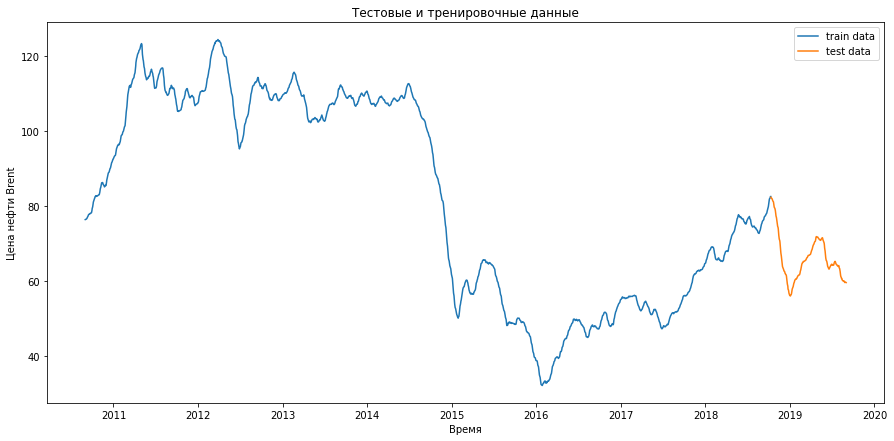

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

train_b, test_b = split_data_b( df, '10-10-2018')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Цена нефти Brent')
plt.plot(train_b.index.get_level_values('Дата'),train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Дата'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

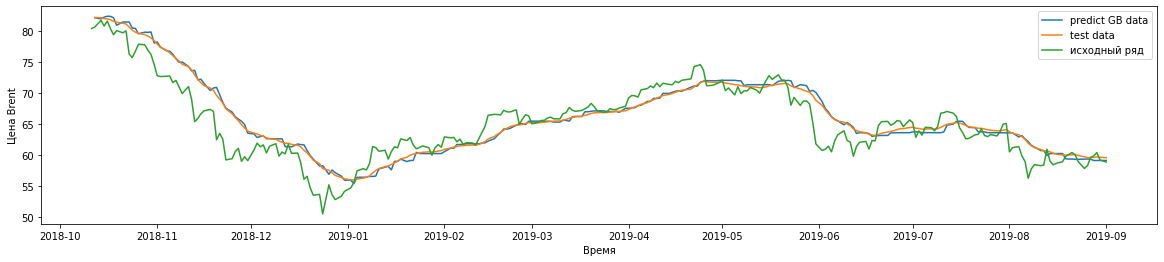

ошибка градиентного бустинга :   0.4956499255487905 %


In [ ]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-10-11':].index, b_s.loc['2018-10-11':]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

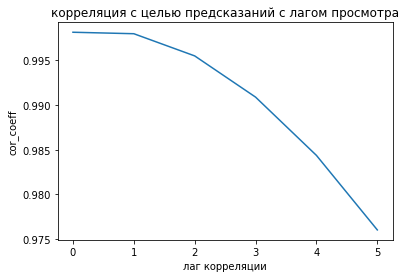

In [ ]:
lag=5
p_cor=[np.corrcoef( y_test_b, X_test_pred_gb)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_b[:-(i+1)], X_test_pred_gb[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) ) 
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

Модель авторегрессии с горизонтом прогноза 1 (т.е. считаем на один шаг вперед) работает замечательно на всем интервале теста. Значение ошибки для нее не превышает 1%. Однако моделируем только нестационарный процесс и на коротком интервале прогноза. увеличим интервал прогноза до 10 шагов вперед.

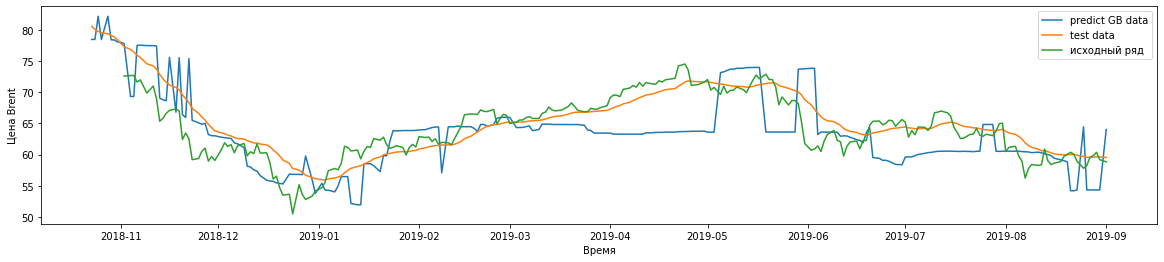

ошибка градиентного бустинга :   4.83159272278207 %


In [ ]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-11-02':].index, b_s.loc['2018-11-02':]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Очевидно, все стало не так хорошо (почти 4.5% ошибки по основной линии прогноза и много по реальному ряду)

Рассмотрим результаты моделирования. Исторические данные позволили повысить качество предсказания (было более 10% ошибки на ошном шаге вперед)

**`ARIMA`** - Авторегрессионная модель скользящего среднего. В области анализа временных рядов модель авторегрессии (autoregressive, AR) и модель скользящего среднего (moving average, MA) является сравнительно простой и оперирует 2-мя параметрами: глубиной регрессии - р и длиной скользящего среднего - q. Чем больше q - тем больше сглаживание ряда 

**`ARIMA`** - Интегрированная Авторегрессионная модель скользящего среднего, построена для ряда первых разностей. Определяется на 3-х параметрах : p — порядок компоненты AR, d — порядок интегрированного ряда, q — порядок компонеты MA.

Определим параметры **ARIMA**.

Для этого используем `ACF` (определит q) и `PACF` (определит p)

`ACF` - автокорреляционная функция, по коррелограмме которой можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA.

`PACF` - автокорреляционная функция первых разностей, по коррелограмме которой можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.

Построим такие коррелограммы из statsmodels по функциям `plot_acf()` и `plot_pacf()`. Графики `ACF и PACF`, где по оси **X** откладываются номера лагов, а по оси **Y** значения соответствующих функций.

Для скорости и удобства отображения посмотрим на более простых данных - ресемплингах исходного ряда на дневные(data_d), месячные (data_m), недельные (data_w) и 3-х месячные ряды(data_Y)

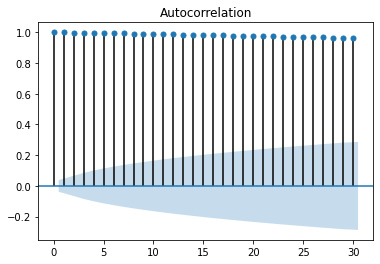

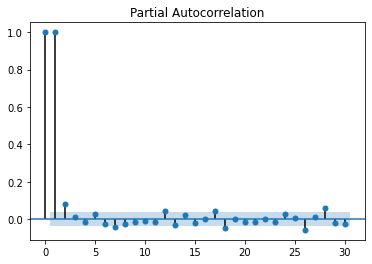

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=30)
plt.show()

sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=30)
plt.show()

Посмотрим на особенности моделирования такого ряда. Напомним, что нет сезонности, есть интегральность, есть изменяющиеся во времени тенденции.

Построим ACF и PACF для первых разностей

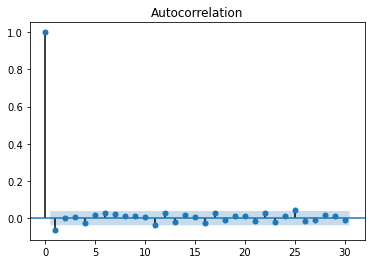

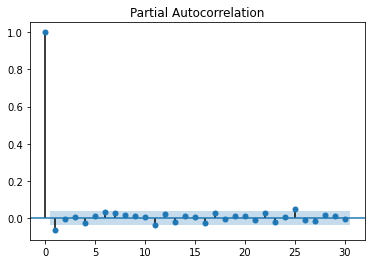

In [ ]:
brent_dif = brent_data['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=30)
plt.show()

sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=30)
plt.show()


Дневные графики показывают автокорреляцию цены со всеми значениями ранее (это не очень хорошо) и для на PACF мы видим, что только 1-й порядок разностей важен для нашего процесса (AR 1). Это полностью согласуется с проведенным ранее анализом. Таким образом:

Сезона нет.
ACF - медленно падает для дневныхи графиков, а для первых разностей ACF - быстро падает (не более 1-й корреляции)
PACF - быстро пададает, а для первых разностей РACF - быстро падает (не более 1-й корреляции)
q , p - берем р=1(2) (PACF) , q =1(2) (скорее всего не очень большой после производной)
ADF - 1 раз интегрируемый - d = 1

Запустим модель без сезонного анализа 

In [ ]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

N2=30

modb = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:8588.998899990416
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 2637
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -4288.499
Date:                Fri, 25 Dec 2020   AIC                           8588.999
Time:                        06:38:47   BIC                           8624.256
Sample:                             0   HQIC                          8601.765
                               - 2637                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    

Коэффициент модели ar.L2 имеет малое абсолютное значение, что свидетельствует о том, что он не играет роли при определении ответа модели. посмотрим на визуализацию результатов работы модели, где видно, что остатки ряда распределены не одинаково на краях модели и в ее основной части, что не позволит принимать правильное решение (рис.Normal Q-Q, Standardized rezidual)

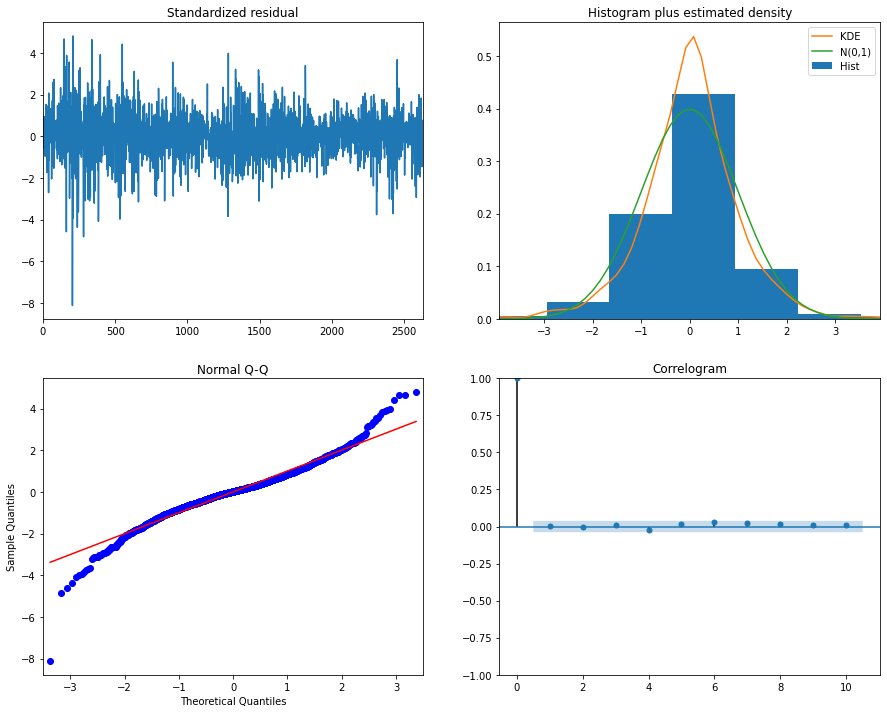

In [ ]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

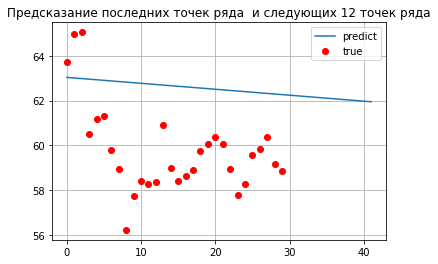

In [ ]:
pred_dynamic = resultsb.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-30:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

Для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q), используем сеточный поиск

In [ ]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_data['Значение'].values[:-100]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:324.5256481108538


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-956.5057886400932


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-1446.6959356392317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-1753.210595833485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-1867.948312892727


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-1982.978961744077


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-2053.622633611778


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-13617.21702785215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-13620.883061607141


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-13616.650873065908


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-13609.69552440451


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-13603.742405615063


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-13596.239664740484


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-13593.241067846164


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-13624.882886054493


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-13628.232737673074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-13624.26241301577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-13617.465862165729


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-13611.325345242443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 5)x[0, 0, 0, 0] - AIC:-13603.834288884904


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 6)x[0, 0, 0, 0] - AIC:-13600.864044112994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:-13628.010197807544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:-13620.822577185518


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:-13614.652441232945


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x[0, 0, 0, 0] - AIC:-13607.472680077015


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x[0, 0, 0, 0] - AIC:-13599.794123835534


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 5)x[0, 0, 0, 0] - AIC:-13593.960823851023


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 6)x[0, 0, 0, 0] - AIC:-13589.746610781898



Поиск по сетке определяет модель ARIMA(1, 1, 0)- AIC:-13993.81

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



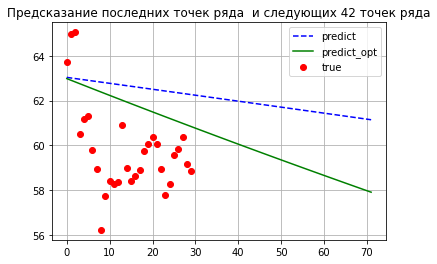

In [ ]:
N2=30
nforecast = N2+42

modb_opt = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-N2],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 30 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(72) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.legend()
plt.grid()
plt.show()


Улучшеная модель ближе к первым по времени точкам выборки на отрезке предсказания. Однако общий результат моделирования еще далек от идеала. Проверим остатки модели.

In [ ]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,0.3562,0.160,2.224,0.026,0.042,0.670
drift,-9.469e-05,4.6e-05,-2.060,0.039,-0.000,-4.6e-06
ar.L1,0.9971,0.001,740.257,0.000,0.994,1.000
ma.L1,-0.0623,0.016,-3.897,0.000,-0.094,-0.031
sigma2,1.5170,0.025,60.334,0.000,1.468,1.566


Посмотрим на модель на этапе предсказания и этапе описания данных

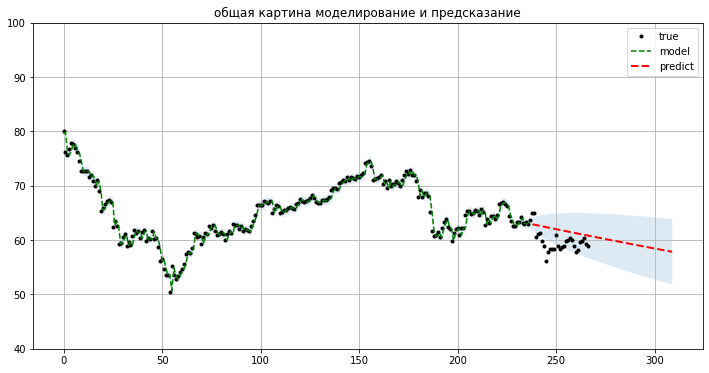

In [ ]:
N2=30 # число точек для теста
nforecast = N2+42  # общее число точек для предсказания (тест+ чистое предсказание)
N3=2400  # отступ от начала известной информации для визуализации - так виднее (можно брать 0-2600)
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_data['Значение'].values[N3:], 'k.',label='true')
plt.ylim([40,100])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

In [ ]:
adf_test = sm.tsa.stattools.adfuller(resultsb_opt.resid)
print(adf_test)

(-80.24885030948928, 0.0, 0, 2636, {'1%': -3.4328331864239274, '5%': -2.8626370834536976, '10%': -2.56735401579277}, 8506.238580534133)


ADF тест (adf_test[1] = 0) показывает, что пока остатки являются стационарным рядом,и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени. Это значит, что можно уверенно прогнозировать - значения модели в диапазоне дисперсии остатков.

Посмотрим на модель для 1-х разностей.

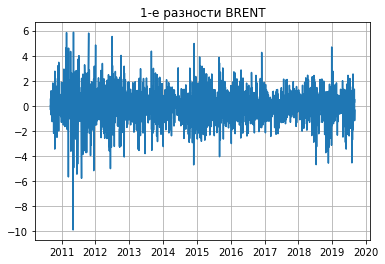

In [ ]:
plt.plot(brent_dif)
plt.grid()
plt.title('1-е разности BRENT')
plt.show()

In [ ]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0,1)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_bd = sm.tsa.statespace.SARIMAX(brent_dif[100:-100],order=param,seasonal_order=[0,0,0,0],
                                          stepwise=False, approximation=False, max_order=2)

        results_ = mod_bd.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:8071.704148175584
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:9926.5639363134
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:8064.22003396567
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:9119.372696938806


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



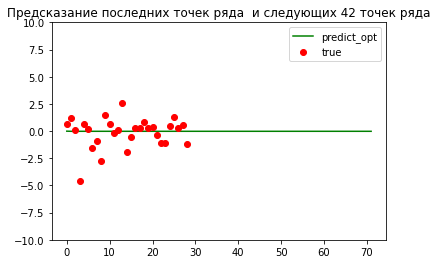

In [ ]:
N1=100
N2=30
nforecast = N2+42
modb_optd = sm.tsa.statespace.SARIMAX(brent_dif[N1:-N2],
                               order=[1,0,0],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_optd = modb_optd.fit()
#делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = resultsb_optd.forecast(nforecast) 

plt.plot(pred_dynamic_opt.values,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_dif.values[-N2:-1],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.ylim([-10,10])
plt.legend()
plt.plot()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



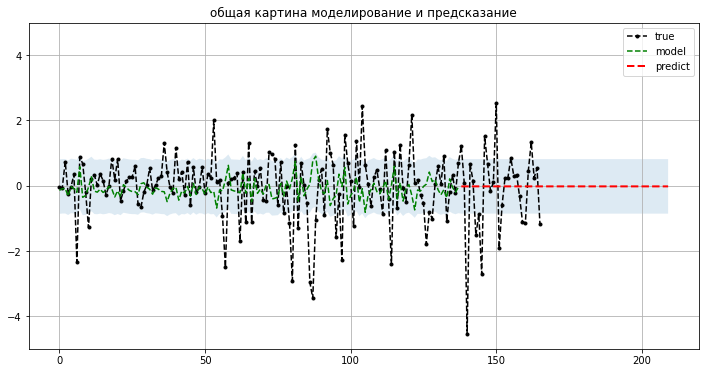

In [ ]:
N3 = 2400
predict_ = resultsb_optd.get_prediction(end=resultsb_optd.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_dif.values[N3+N1:-1], '--k.',label='true')
plt.ylim([-5,5])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast]*5, '--g',label='model') # увеличена амплитуда в 5 раз - иначе не видно
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci.iloc[N3:, 0], predict_ci.iloc[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');


Модель "Идеальна" , т.к. это случайное биение, которое ARIMA предсказывает очень хорошо (описываем параметры шума).

### Генерация признаков из внешних источников

Естественным попутчиком любого финансово -ориентированного ряда является кросс-курс валют. В случае BRENT патриотично рассматриваем кросс-курс доллар-рубль (стоимость доллара в рублях) и евро-рубль (стоимость евро в рублях). Интервал измерения стоимости доллара и евро соответствует частоте и периоду нашего ряда "стоимость нефти", а источник данных https://www.cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=R01235&UniDbQuery.FromDate=01.09.2010&UniDbQuery.ToDate=01.09.2019, который позволяет сохранить результаты в нескольких различных вариантах. Прочитаем, сохраненные данные.

In [ ]:
rub_doll=pd.read_excel('/content/drive/MyDrive/Анализ_Данных_Соцкова_Вероника_11-802/Project/RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [ ]:
rub_e=pd.read_excel('/content/drive/MyDrive/Анализ_Данных_Соцкова_Вероника_11-802/Project/RC_F01_09_2010_T01_09_2019_e.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.head()

,curs
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


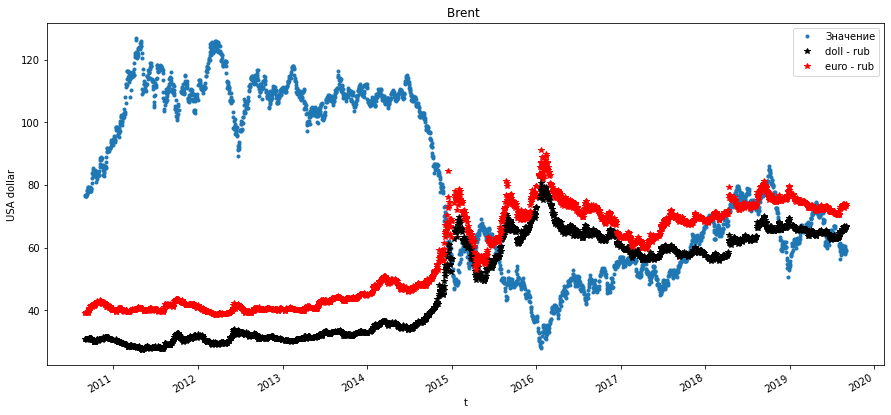

In [ ]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.plot(rub_doll.index,rub_doll['curs'].values,'*k', label='doll - rub')
plt.plot(rub_e.index,rub_e['curs'].values,'*r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

Посмотрим на первые разности. Помним, что для BRENT первые разности стационарны. Проверим как выглядят они для кросс-курсов.



---

---





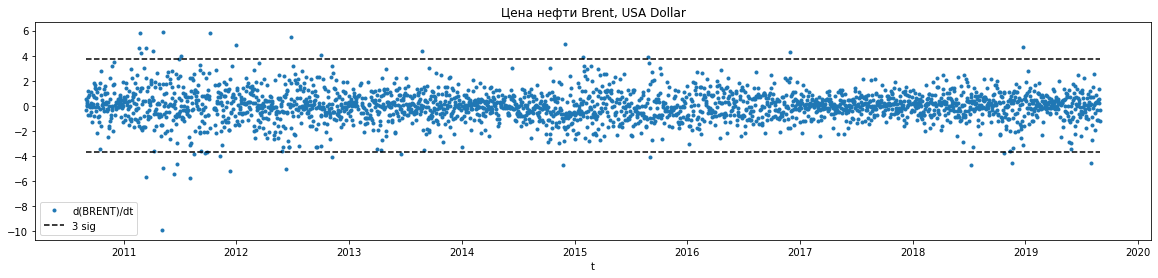

In [ ]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]
s_brent = np.std(d_brent_data) *3
plt.figure(figsize=(20,4))
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]

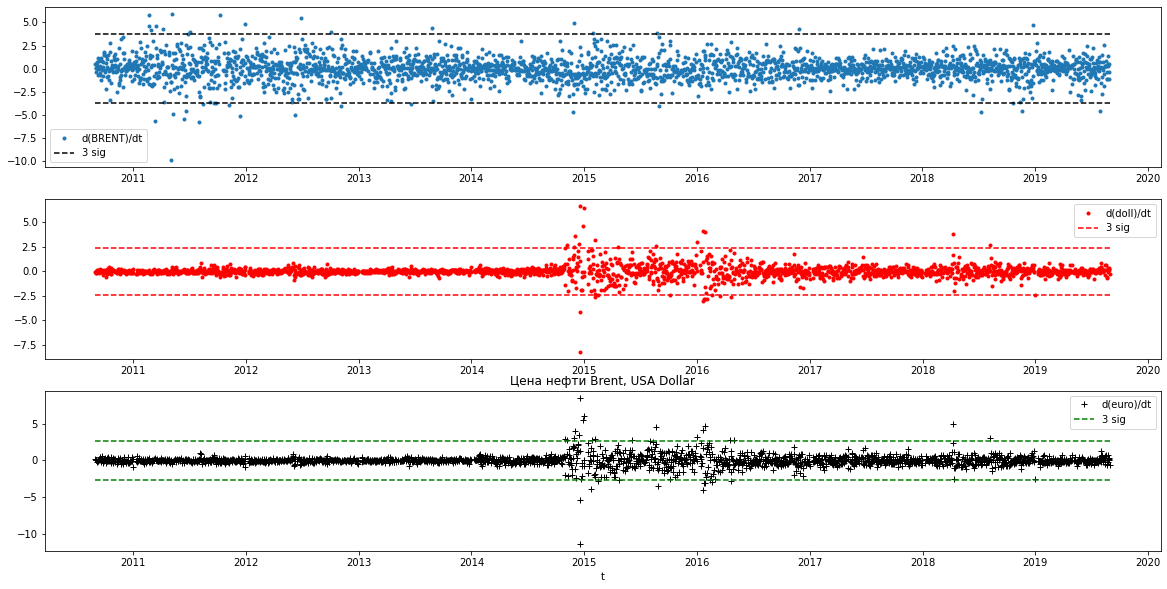

In [ ]:
d_rub_doll = rub_doll['curs'].values[1:]- rub_doll['curs'].values[:-1]
s_rub = np.std(d_rub_doll)**0.5 *3

d_rub_e = rub_e['curs'].values[1:]- rub_e['curs'].values[:-1]
s_rube = np.std(d_rub_e)**0.5 *3

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.legend()

plt.subplot(3,1,2)
plt.plot(rub_doll.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(rub_doll.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(rub_doll.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(rub_e.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(rub_e.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_e.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]
ind_anomal_rubl_d = np.where( abs(d_rub_doll)>s_rub)[0]
ind_anomal_rubl_e = np.where( abs(d_rub_e)>s_rube)[0]

Проблема кросс-курса с рублем в том, что трудно сказать курс зависит от цены нефти или цена от курса (но по логике экономики должен курс рубля зависеть от цены нефти). 2016 в январе курс к доллару составил 82 р (https://www.gazeta.ru/business/2016/01/20/8031815.shtml) на фоне резкого падения цены нефти (иранский фактор - сняли эмбарго на экспорт в начале января). Однако, если в некоторый день цена нефти и кросс-курс ведут себя разнонаправленно, то можно предположить. что это не глобальное явление, а некоторый случайный выброс. Декабрь 2015-январь 2016 - смена уровня , т.е. глобальное изменение ряда по типу аномалии "изменение характера (распределения) значений". В данном случае сильно изменяется средняя ряда.

In [ ]:
brent_data['doll']=0.0
brent_data['doll'].values[1:2229]=rub_doll['curs'].values[:]
brent_data=brent_data.iloc[:2229,:]

In [ ]:
p =3

#добавляем историю длиной р
for i in range(p):
    brent_data['doll_t'+str(p-i+1)]=0.0
    brent_data['doll_t'+str(p-i+1)].values[p+2:] = brent_data['doll'].values[i+1:-(p-i+1)]

In [ ]:
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll,doll_t4,doll_t3,doll_t2
Дата,,,,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.0000,0.0,0.0,0.0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,30.8669,0.0,0.0,0.0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,30.8001,0.0,0.0,0.0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,30.6858,0.0,0.0,0.0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,30.6922,0.0,0.0,0.0


### **Выделение существенных признаков**


Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1)

In [ ]:
scl_target=StandardScaler() 

h=1
target = brent_data["Значение"].values[h:].reshape((brent_data.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(2228, 1)

In [ ]:
scl_x=StandardScaler() 

X = brent_data.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(2228, 15)


Размеры выборок по строкам совпали. Мы взяли на h строк меньше для Х и на h значений позднее по target. Таким образом, входной набор данных сформирован.

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())

for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=1107279.65,  I=0
F-test=3410.44,  I=1
F-test=0.58,  I=2
F-test=0.12,  I=3
F-test=0.44,  I=4
F-test=0.57,  I=5
F-test=0.56,  I=6
F-test=14.25,  I=7
F-test=0.29,  I=8
F-test=0.65,  I=9
F-test=0.23,  I=10
F-test=3672.93,  I=11
F-test=3592.02,  I=12
F-test=3574.28,  I=13
F-test=3556.41,  I=14


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда (признак X[:,0]), а кроме этого интересные признаки 1 , 7, 11, 12, 13 и 17. Применим автоматизацию выбора через SelectKBest c выделением 5 лучших признаков.

In [ ]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(2228, 5)

Лучшее множество признаков отделенов X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [ ]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(2228, 2)


Наконец, третий вариант - применим выделение признаков через построение модели . Помним , что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [ ]:

gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(2228, 1)

In [ ]:
[X_new1[:5,:], X_new2[:5,:],X_new3[:5,:]]

[array([[-0.27057742, -3.0299927 , -3.00147248, -3.00237817, -3.00327529],
        [-0.25201489, -1.08554417, -3.00147248, -3.00237817, -3.00327529],
        [-0.26343799, -1.08975221, -3.00147248, -3.00237817, -3.00327529],
        [-0.26165313, -1.09695249, -3.00147248, -3.00237817, -3.00327529],
        [-0.26129616, -1.09654933, -3.00147248, -3.00237817, -3.00327529]]),
 array([[-0.27057742, -3.0299927 ],
        [-0.25201489, -1.08554417],
        [-0.26343799, -1.08975221],
        [-0.26165313, -1.09695249],
        [-0.26129616, -1.09654933]]),
 array([[-0.27057742],
        [-0.25201489],
        [-0.26343799],
        [-0.26165313],
        [-0.26129616]])]

In [ ]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 11 12 13 14]
Номера признаков лучших признаков по процентной форме:  [ 0 11]
Номера признаков для выбора по модели :  [0]



Пересечение выбора по отбору для модели и по количественным оценкам связи в признаке 0. Имеет смысл брать объединение выборов. Возьмем [0,11,12,13,14] признаки и перейдем к построению модели: `Значение doll	doll_t4	doll_t3	doll_t2`

In [ ]:
X_new = X[:,[0,11,12,13,14]]

In [ ]:
brent_data

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll,doll_t4,doll_t3,doll_t2
Дата,,,,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.0000,0.0000,0.0000,0.0000
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,30.8669,0.0000,0.0000,0.0000
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,30.8001,0.0000,0.0000,0.0000
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,30.6858,0.0000,0.0000,0.0000
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,30.6922,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-29,69.35,2018,3,29,1,88,13,3,0,0,0,65.9735,66.7840,66.2630,65.6196
2018-04-01,69.51,2018,4,1,2,91,13,6,0,0,0,66.2608,66.2630,65.6196,65.6046
2018-04-02,67.57,2018,4,2,2,92,14,0,0,0,0,66.4127,65.6196,65.6046,65.9735


### Разделение выборки

In [ ]:
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

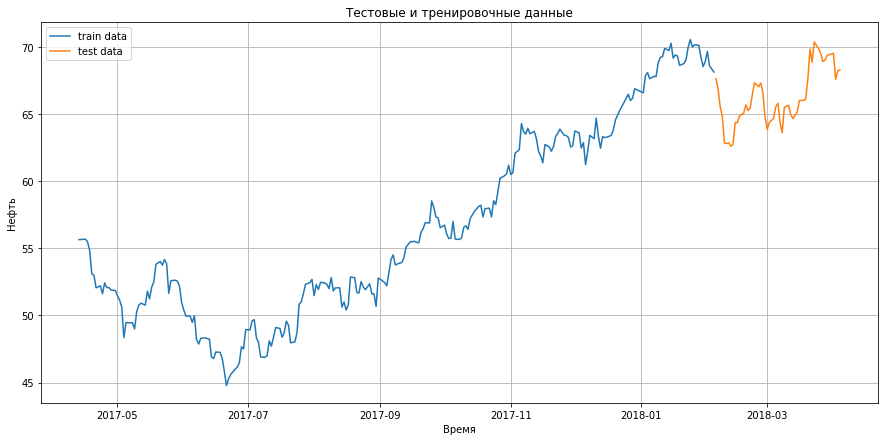

In [ ]:
N_x = -300
N_split = -50

train, test = split_data( brent_data[N_x:], N_split)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [ ]:
X_train =X_new[N_x:N_split,:]
y_train =y[N_x:N_split,0]
X_test =X_new[N_split:,:]
y_test =y[N_split:,0]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

model_l.fit( X_train, y_train ) # 
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

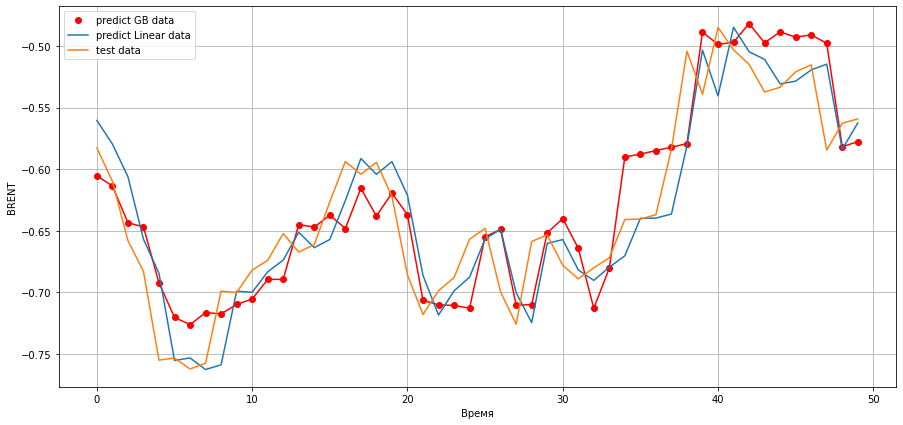

In [ ]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:100],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:100],'r' )
plt.plot(y_test_pred_l[:100], label='predict Linear data' )
plt.plot(y_test[:100], label='test data')
plt.grid()
plt.legend()
plt.show()

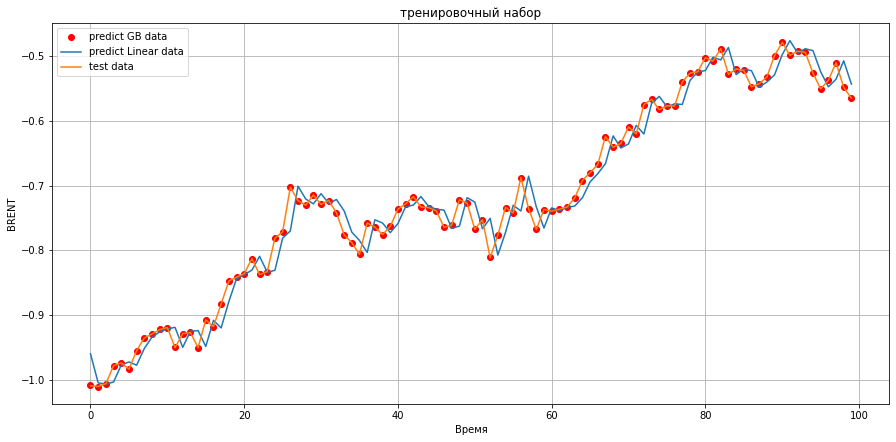

In [ ]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g[-100:],'or', label='predict GB data' )
plt.plot(y_pred_l[-100:], label='predict Linear data' )
plt.plot(y_train[-100:], label='test data')
plt.grid()
plt.legend()
plt.show()


Линейная модель практически не работает, т.к. видно запаздывание в размере h.Градиентный бустинг практически не отличается от нее на интервале обучения. Посмотрим на оценки.

### **Оценки для сравнения моделей**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.0012855443249928738 
ошибка mae  :   0.029828551521851328 
оценка R2 :   0.7593517419880507


Абсолютная процентная ошибка (MAPE).Обратите внимание, что определять ее для масштабированной переменной не верно. Поэтому переведем ответ решателя обратно в состояние без масштаба.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   1.263528779495134 %


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.283 (std: 0.901)
Parameters: {'n_estimators': 400, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.273 (std: 0.891)
Parameters: {'n_estimators': 500, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.265 (std: 0.887)
Parameters: {'n_estimators': 200, 'max_depth': 3}



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=300)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

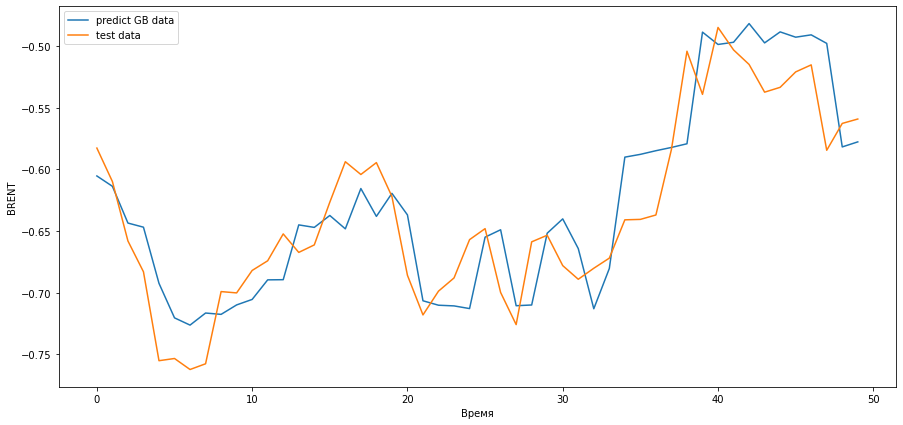

In [ ]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

### **Заключение**
Прогнозирование на основе обучения позволяет эффективно описывать достаточно сложные данные. Построение прогноза на основе генерации регрессионных моделей позволит построить хороший ответ даже не зная как устроен ряд и каковы его статистические свойства. При решении задачи прогнозирования следует учитывать следующие особенности этого подхода:

- Строим много признаков.
- Обрабатываем признаки и используем результаты статистического анализа ряда для придумывания новых признаков.
- Строим много моделей и не забываем, что тестирование моделей идет только на последних точках ряда.
- Используем правильные метрики.
- Следим за аномалиями